In [1]:
import tensorflow as tf

In [2]:
import sys
print(sys.version)
print(tf.__version__)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
2.0.0-rc1


In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

## MNIST data

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [10]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [11]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [12]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [13]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [16]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## CNN

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [20]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 276us/sample - loss: 0.2478 - accuracy: 0.9252 - val_loss: 0.0538 - val_accuracy: 0.9821
Epoch 2/12
60000/60000 [==============================] - 11s 191us/sample - loss: 0.0865 - accuracy: 0.9741 - val_loss: 0.0404 - val_accuracy: 0.9856
Epoch 3/12
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0670 - accuracy: 0.9800 - val_loss: 0.0332 - val_accuracy: 0.9887
Epoch 4/12
60000/60000 [==============================] - 12s 195us/sample - loss: 0.0543 - accuracy: 0.9835 - val_loss: 0.0306 - val_accuracy: 0.9905
Epoch 5/12
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0313 - val_accuracy: 0.9891
Epoch 6/12
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0265 - val_accuracy: 0.9918
Epoch 7/12
60000/60000 [=======================

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028271958214271534
Test accuracy: 0.9913


## CNN autoencoder

In [22]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [35]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0   

In [29]:
%load_ext tensorboard

In [30]:
%tensorboard --logdir .

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 6788.

Open the http://localhost:6006/ in browser to use Tensorboard.

More on Tensorboard: https://www.tensorflow.org/tensorboard/r2/get_started#using_tensorboard_with_keras_modelfit

In [37]:
from tensorflow.keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='.')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2009 - val_loss: 0.1429
Epoch 2/50
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1339 - val_loss: 0.1254
Epoch 3/50
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1220 - val_loss: 0.1172
Epoch 4/50
60000/60000 [==============================] - 8s 141us/sample - loss: 0.1157 - val_loss: 0.1122
Epoch 5/50
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1115 - val_loss: 0.1089
Epoch 6/50
60000/60000 [==============================] - 10s 158us/sample - loss: 0.1086 - val_loss: 0.1065
Epoch 7/50
60000/60000 [==============================] - 9s 153us/sample - loss: 0.1066 - val_loss: 0.1047
Epoch 8/50
60000/60000 [==============================] - 9s 156us/sample - loss: 0.1048 - val_loss: 0.1030
Epoch 9/50
60000/60000 [==============================] - 12s 207us/sample - loss: 0

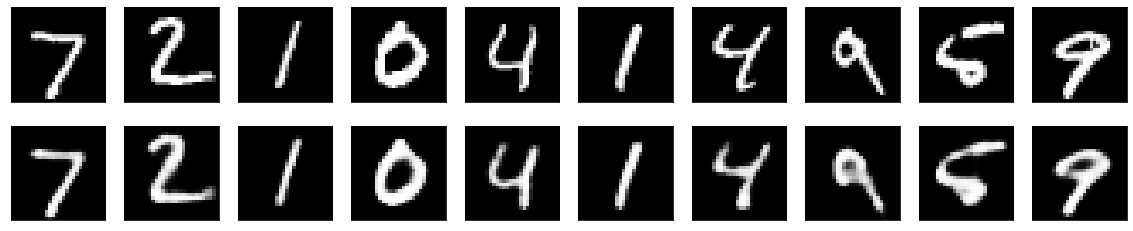

In [38]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [40]:
score = autoencoder.evaluate(x_test, x_test, verbose=0)

In [41]:
score

0.088706576192379

In [42]:
cnn_encoder = Model(input_img, encoded)

In [43]:
x_test.shape

(10000, 28, 28, 1)

In [44]:
encoded_imgs = cnn_encoder.predict(x_test)

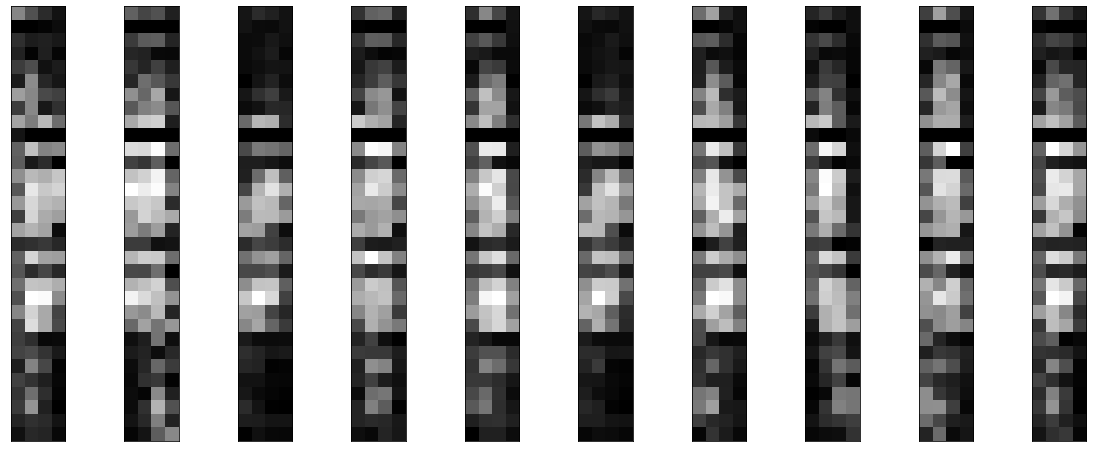

In [45]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Model saving

In [46]:
autoencoder.save("cnn_autoencoder.h5")

In [6]:
from tensorflow.keras.models import load_model

In [48]:
del autoencoder

In [7]:
restored_model = load_model("cnn_autoencoder.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
restored_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 8)           0   

## Using trained models

https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [9]:
vgg19 = tf.keras.applications.vgg19.VGG19(  # 570 Mb
    include_top=True,
    weights='imagenet', 
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000)

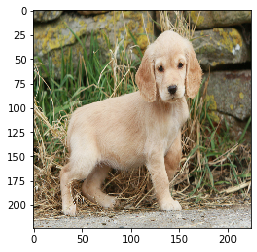

In [10]:
img_path = 'dog.jpg'

from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

In [11]:
str(img)

'<PIL.Image.Image image mode=RGB size=224x224 at 0x289F505B7F0>'

In [12]:
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = tf.keras.applications.vgg19.preprocess_input(x)
print(x.shape)

(224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [13]:
res=vgg19.predict(x)
res.shape

(1, 1000)

In [14]:
res

array([[1.10930387e-05, 2.56522253e-06, 1.26345071e-06, 8.49679395e-07,
        5.63886033e-06, 3.41120312e-06, 3.44479901e-07, 4.43124190e-06,
        4.76909372e-05, 5.05355501e-07, 6.16952889e-07, 8.27683778e-07,
        3.51625204e-06, 1.83759653e-06, 1.51337736e-06, 2.18312425e-06,
        7.05130844e-07, 2.92731102e-06, 6.97464372e-07, 1.54960310e-06,
        7.18754450e-07, 2.18273067e-06, 5.36023344e-06, 1.41509699e-05,
        2.98485361e-06, 6.66250025e-06, 9.03315777e-06, 6.51917117e-06,
        1.93163578e-06, 1.02317358e-06, 1.90026697e-06, 2.25005806e-06,
        4.63641845e-06, 2.71096815e-06, 3.27298130e-06, 9.78269327e-06,
        7.49322362e-06, 9.39795245e-06, 1.31981069e-05, 1.70080984e-05,
        3.14756435e-05, 7.54196371e-05, 3.69662193e-05, 4.26325423e-05,
        9.59702993e-06, 3.17903937e-06, 3.85292151e-05, 7.99869940e-06,
        5.87192881e-05, 4.40627809e-06, 4.42231294e-06, 5.36274410e-06,
        8.77452931e-06, 2.05343463e-06, 3.23875202e-06, 2.745515

In [15]:
np.argmax(res, axis=1)

array([207], dtype=int64)

In [16]:
tf.keras.applications.vgg19.decode_predictions(res)

[[('n02099601', 'golden_retriever', 0.78406376),
  ('n02102318', 'cocker_spaniel', 0.038392425),
  ('n02091831', 'Saluki', 0.0342828),
  ('n02115641', 'dingo', 0.03341517),
  ('n02099712', 'Labrador_retriever', 0.028382083)]]

In [17]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
xcept = tf.keras.applications.xception.Xception(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000)

In [19]:
xcept.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [20]:
from tensorflow.keras.utils import plot_model, model_to_dot
from IPython.display import SVG

In [ ]:
# YOU MAY NEED TO INSTALL THESE MODULES
#!conda install graphviz #(I use Anaconda)
#!pip install pydotplus
#!pip install pydot

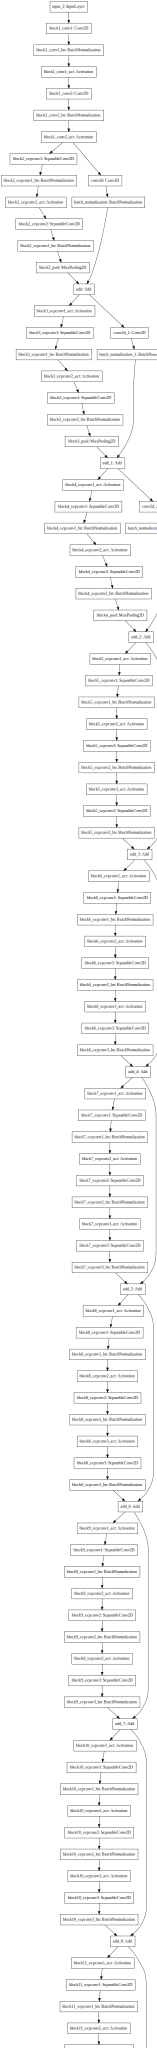

In [22]:
SVG(model_to_dot(xcept).create(prog='dot', format='svg'))

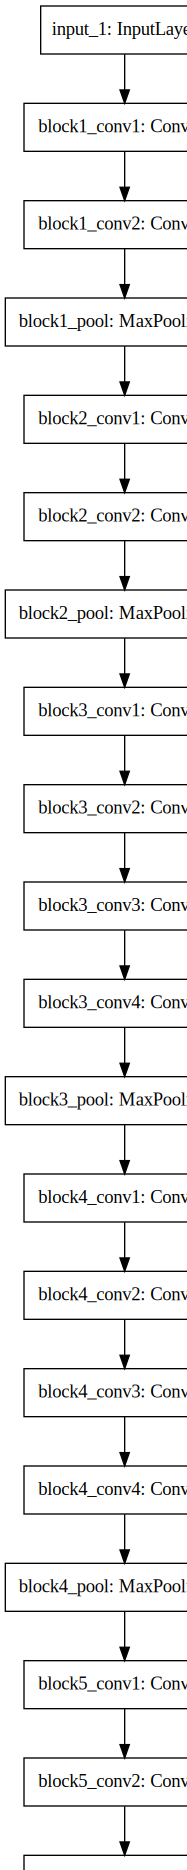

In [23]:
SVG(model_to_dot(vgg19).create(prog='dot', format='svg'))

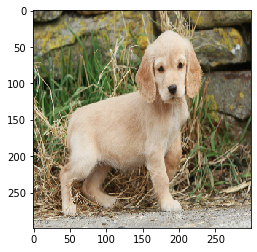

In [24]:
img = image.load_img(img_path, target_size=(299, 299))
plt.imshow(img)
plt.show()

In [26]:
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = tf.keras.applications.xception.preprocess_input(x)
print(x.shape)
res=xcept.predict(x)
print(res.shape)
tf.keras.applications.xception.decode_predictions(res)

(299, 299, 3)
(1, 299, 299, 3)
(1, 299, 299, 3)
(1, 1000)


[[('n02099601', 'golden_retriever', 0.47158465),
  ('n02102318', 'cocker_spaniel', 0.12101043),
  ('n02099712', 'Labrador_retriever', 0.08217219),
  ('n02101556', 'clumber', 0.021299073),
  ('n02102480', 'Sussex_spaniel', 0.01892862)]]

In [27]:
del vgg19, xcept